## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [26]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [27]:
train, test = keras.datasets.cifar10.load_data()

In [28]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [29]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [42]:
def build_mlp(input_shape, activation="relu", units=[512, 256, 128, 64]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for idx, unit in enumerate(units):
        if idx == 0:
            x = keras.layers.Dense(units=unit, activation=activation)(input_layer)
        else:
            x = keras.layers.Dense(units=unit, activation=activation)(x)

    result = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[result])

    return model

model = build_mlp(x_train.shape[1:])
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 1,746,506
Trainable params: 1,746,506
Non-trainable params: 0
_________________________________________________

In [43]:
"""Code Here
設定超參數
"""
LR = [1e-4, 1e-5, 1e-6] 
EPOCH = 100
BATCH_SIZE = 256
MOMENTUM = 0.95


In [45]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LR:
    keras.backend.clear_session()
    model = build_mlp(x_train.shape[1:])
    model.compile(optimizer=keras.optimizers.SGD(learning_rate=lr, nesterov=True, momentum=MOMENTUM),
                  loss="categorical_crossentropy",
                  metrics=["accuracy"])

    model.fit(x_train, 
              y_train,
              validation_data=(x_test, y_test),
              epochs=EPOCH,
              batch_size=BATCH_SIZE)

    results[f"lr_{lr}_acc"] = model.history.history["accuracy"]
    results[f"lr_{lr}_loss"] = model.history.history["loss"]
    results[f"lr_{lr}_val_acc"] = model.history.history["val_accuracy"]
    results[f"lr_{lr}_val_loss"] = model.history.history["val_loss"]

print(results)

08, 0.5197, 0.52096, 0.52256, 0.52402, 0.52522], 'lr_0.0001_loss': [2.2903845314025877, 2.2074883730316164, 2.1341295864105225, 2.0682665771484374, 2.015868556442261, 1.9757098874282837, 1.9442741046905518, 1.9187706211090088, 1.8971713521575928, 1.8785064587402345, 1.8618288756561279, 1.8465027408599854, 1.832011030807495, 1.8189134342193602, 1.8053348137664795, 1.7925745623016358, 1.780592865562439, 1.7693296813201904, 1.7584657529449463, 1.7479662826919555, 1.737821142539978, 1.7285108135223388, 1.7191204131698608, 1.7102376641845702, 1.7016693752670289, 1.6932994635772705, 1.6862048599624633, 1.6782272344970703, 1.671084409866333, 1.6635700591278075, 1.656879387550354, 1.6505590295791626, 1.6437416007232666, 1.6371238690948486, 1.6313879613494873, 1.6249706969451905, 1.6190286166000367, 1.6130821997451783, 1.607383487586975, 1.6016170360565185, 1.59585364112854, 1.5914044452667235, 1.5857822439575195, 1.5799739820098877, 1.575457713623047, 1.570829261856079, 1.5662939749526978, 1.5

In [46]:
results.keys()

dict_keys(['lr_0.0001_acc', 'lr_0.0001_loss', 'lr_0.0001_val_acc', 'lr_0.0001_val_loss', 'lr_1e-05_acc', 'lr_1e-05_loss', 'lr_1e-05_val_acc', 'lr_1e-05_val_loss', 'lr_1e-06_acc', 'lr_1e-06_loss', 'lr_1e-06_val_acc', 'lr_1e-06_val_loss'])

3
lr_0.0001_val_loss
7
lr_1e-05_val_loss
11
lr_1e-06_val_loss


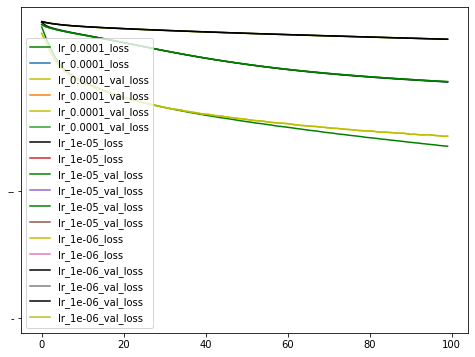

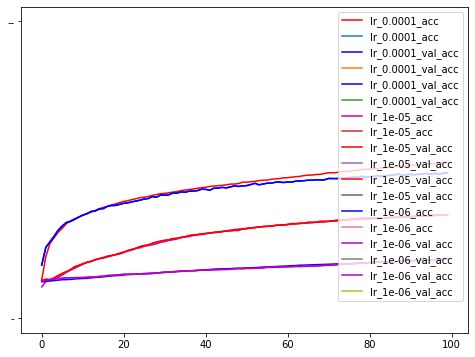

In [74]:
import matplotlib.pyplot as plt
import re
%matplotlib inline
"""Code Here
將結果繪出
"""
pattern = "loss"
reg = re.compile(pattern)
pattern1 = "val_loss"
reg1 = re.compile(pattern1)

colorArray = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for idx, key in enumerate(results.keys()):
    if reg.search(key):
        plt.plot(range(len(results[key])), results[key], colorArray[idx % 6], "-", label=key)
    if reg1.search(key):
        plt.plot(range(len(results[key])), results[key], colorArray[idx % 6], "--", label=key)
plt.legend()
plt.show()


pattern2 = "acc"
reg2 = re.compile(pattern2)
pattern3 = "val_acc"
reg3 = re.compile(pattern3)

plt.figure(figsize=(8,6))
for idx, key in enumerate(results.keys()):
    if reg2.search(key):
        plt.plot(range(len(results[key])), results[key], colorArray[idx % 6], "-", label=key)
    if reg3.search(key):
        plt.plot(range(len(results[key])), results[key], colorArray[idx % 6], "--", label=key)
plt.legend()
plt.show()